In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = sns.load_dataset("titanic")

In [3]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Data Information

* Survived: Outcome of survival (0 = No; 1 = Yes)
* Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
* Sex: Sex of the passenger
* Age: Age of the passenger (Some entries contain NaN)
* SibSp: Number of siblings and spouses of the passenger aboard
* Parch: Number of parents and children of the passenger aboard
* Fare: Fare paid by the passenger
* Cabin Cabin number of the passenger (Some entries contain NaN)
* Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
## Getting columns name

data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


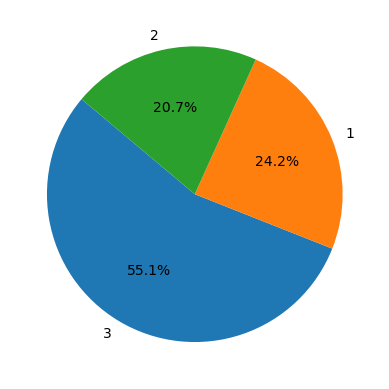

In [6]:
plt.pie(data['pclass'].value_counts(), labels=data['pclass'].value_counts().index, autopct='%.1f%%', startangle=140)
plt.show()

In [7]:
## We can observe that around 55.1% of people on ship belongs to Lower Social Economic class.

<AxesSubplot: xlabel='pclass', ylabel='count'>

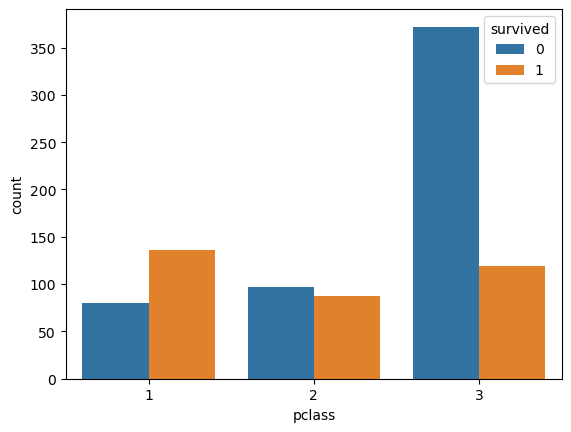

In [8]:
sns.countplot(x=data['pclass'],hue=data['survived'])

In [9]:
## This plot shows the survival rate of  different socio economic class and from here we can see that chances of survival was more for people from First socio economic class.

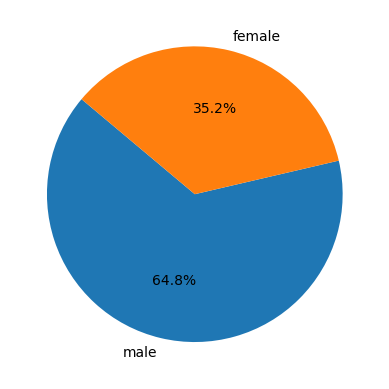

In [10]:
plt.pie(data['sex'].value_counts(), labels=data['sex'].value_counts().index, autopct='%.1f%%', startangle=140)
plt.show()

In [11]:
## This pie plot shows the gender of peoples and majority were males on ship

<AxesSubplot: xlabel='sex', ylabel='count'>

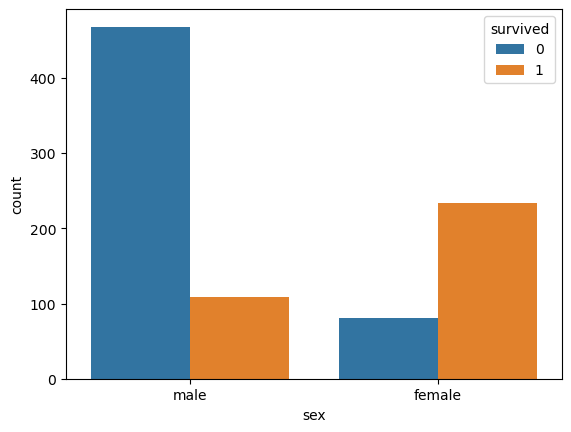

In [12]:
sns.countplot(x=data['sex'],hue=data['survived'])

In [13]:
## From graph we can observe that survival rate was more for females

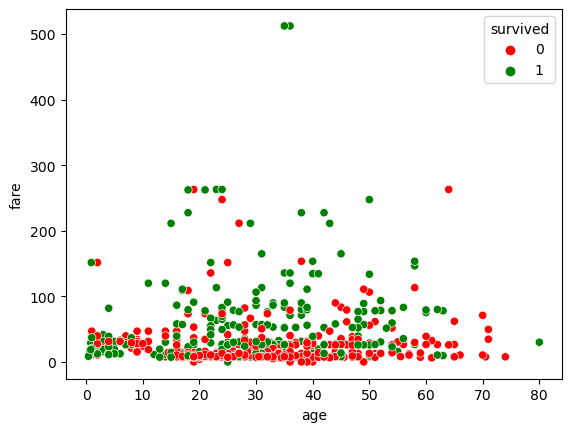

In [14]:
sns.scatterplot(x=data['age'],y=data['fare'],hue=data['survived'], palette={0: 'red', 1: 'green'})
plt.show()

In [15]:
## From here we can observe that those who had paid higher fair had higher chance to survive

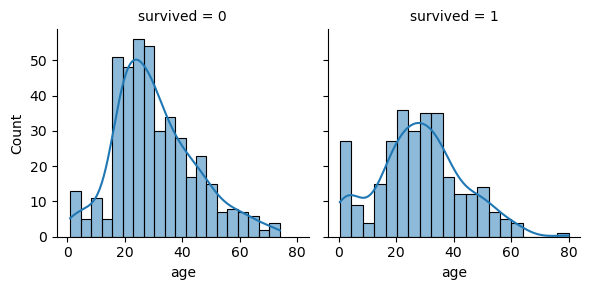

In [16]:
g = sns.FacetGrid(data, col="survived")
g.map(sns.histplot, "age", bins=20,kde=True)
plt.show()

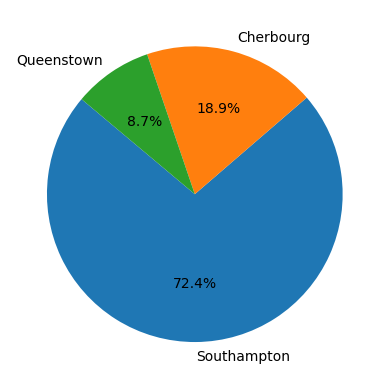

In [17]:
plt.pie(data['embark_town'].value_counts(), labels=data['embark_town'].value_counts().index, autopct='%.1f%%', startangle=140)
plt.show()

In [18]:
## From Above graph we can observe that majority of people on ship where embarked from Southampton and very less from Queenston

<AxesSubplot: xlabel='embark_town', ylabel='count'>

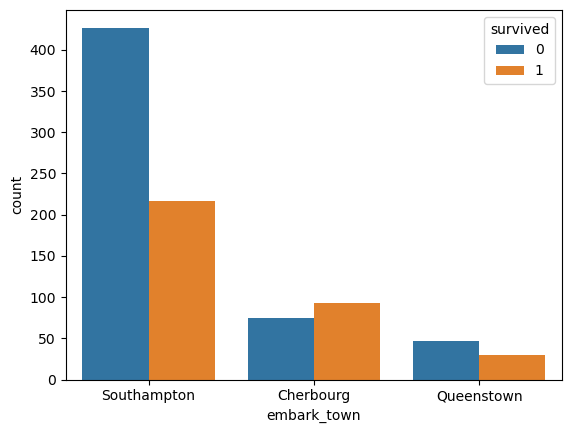

In [19]:
sns.countplot(x=data['embark_town'],hue=data['survived'])

In [20]:
data['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

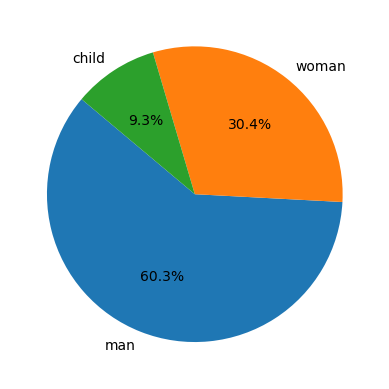

In [21]:
plt.pie(data['who'].value_counts(), labels=data['who'].value_counts().index, autopct='%.1f%%', startangle=140)
plt.show()

In [22]:
## There where very less numbers of childs on ship and majority of them where man and than woman

<AxesSubplot: xlabel='who', ylabel='count'>

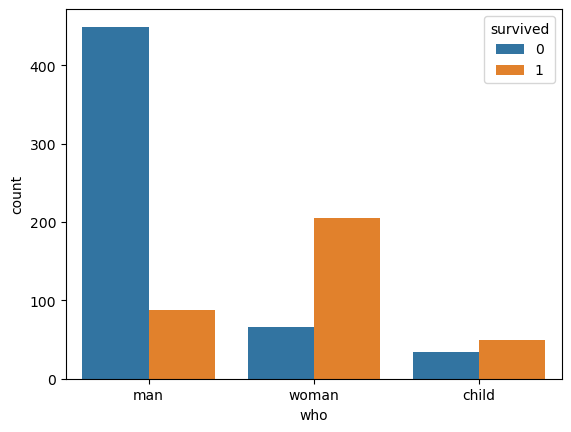

In [23]:
sns.countplot(x=data['who'],hue=data['survived'])

In [24]:
## Majority of woman and child where saved

In [25]:
data['fare'].describe()  ## We can see basic statistics about ticket fare

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

<AxesSubplot: xlabel='fare', ylabel='Density'>

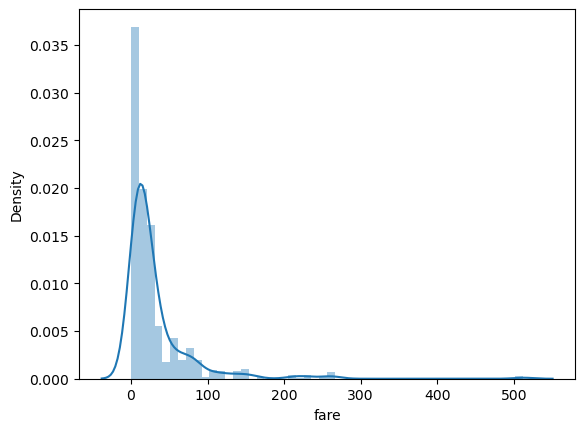

In [26]:
sns.distplot(data['fare'])

In [27]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [28]:
## We can observe that deck column consist of 688 null values out of 891 values

data.drop(columns=['deck'],axis=0,inplace=True)

In [29]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [30]:
data[data['embarked'].isnull()]  ## There are 2 missing values embarked and embark_town therefore we can drop this rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,NaN,yes,True


In [31]:
data.drop(index=[61,829],inplace=True)

In [32]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [33]:
data.shape

(889, 14)

In [34]:
data[data["age"].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,Southampton,no,True


<AxesSubplot: xlabel='age', ylabel='Density'>

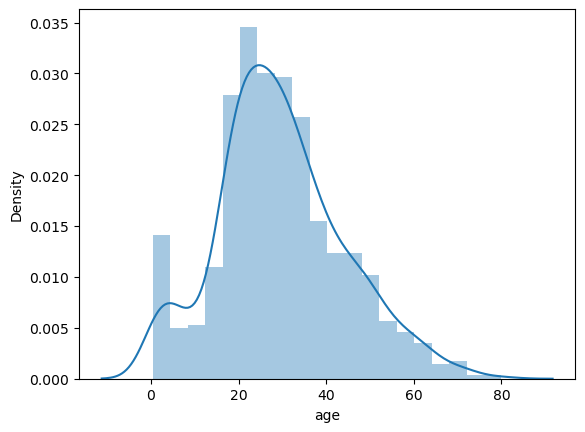

In [35]:
sns.distplot(data['age']) ## Majority of people on titanic have the age between 20-40

<AxesSubplot: >

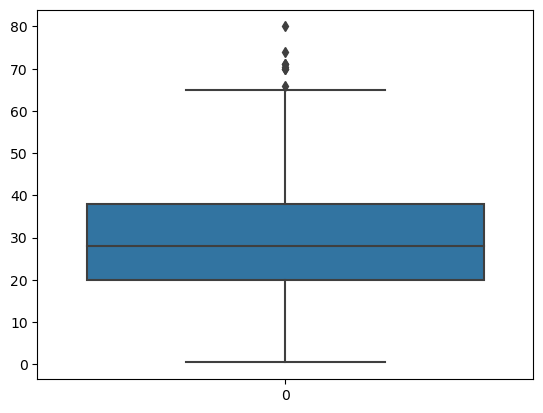

In [36]:
sns.boxplot(data['age'])  ## There are few outliers in age 

In [37]:
median_age_by_gender = data.groupby('sex')['age'].median()

In [38]:
data.groupby('sex')['age'].mean()

sex
female    27.745174
male      30.726645
Name: age, dtype: float64

In [39]:
data.groupby('sex')['age'].count()

sex
female    259
male      453
Name: age, dtype: int64

In [40]:
## We fill the missing values in age columns according to median age of genders

def impute_age(row):
    if pd.isnull(row['age']):
        return median_age_by_gender[row['sex']]
    return row['age']


In [41]:
data['age'] = data.apply(impute_age, axis=1)

In [42]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,27.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [43]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 118.4+ KB


In [45]:
## Encoding sex column: Male=1,Female=0

data['sex'] = [0 if i=='female' else 1 for i in data['sex']]

In [46]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,0,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,0,27.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,1,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [47]:
## Encoding class column: First=1, Second=2, Third=3

_class = []
for i in data['class']:
    if i == 'First':
        _class.append(1)
    elif i == 'Second':
        _class.append(2)
    elif i == 'Third':
        _class.append(3)

In [48]:
data['class'] = _class

In [49]:
## Encoding adult_male column: True=1,False=0

data['adult_male'] = [1 if i==True else 0 for i in data['adult_male']]

In [50]:
## Encoding alive column: yes=1,no=0

data['alive'] = [1 if i=='yes' else 0 for i in data['alive']]

In [51]:
## Checking correlation between alive and survived

data[['survived','alive']].corr()

,survived,alive
survived,1.0,1.0
alive,1.0,1.0


In [52]:
## They represent same thing and since survived is our target featuree we should drop alive column

In [53]:
data.drop(columns=['alive'],axis=1,inplace=True)

In [54]:
## Encoding alone column: True=1,False=0

data['alone'] = [1 if i==True else 0 for i in data['alone']]

In [55]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,S,3,man,1,Southampton,0
1,1,1,0,38.0,1,0,71.2833,C,1,woman,0,Cherbourg,0
2,1,3,0,26.0,0,0,7.9250,S,3,woman,0,Southampton,1
3,1,1,0,35.0,1,0,53.1000,S,1,woman,0,Southampton,0
4,0,3,1,35.0,0,0,8.0500,S,3,man,1,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S,2,man,1,Southampton,1
887,1,1,0,19.0,0,0,30.0000,S,1,woman,0,Southampton,1
888,0,3,0,27.0,1,2,23.4500,S,3,woman,0,Southampton,0
889,1,1,1,26.0,0,0,30.0000,C,1,man,1,Cherbourg,1


In [56]:
data.reset_index(drop=True,inplace=True)

In [57]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,S,3,man,1,Southampton,0
1,1,1,0,38.0,1,0,71.2833,C,1,woman,0,Cherbourg,0
2,1,3,0,26.0,0,0,7.9250,S,3,woman,0,Southampton,1
3,1,1,0,35.0,1,0,53.1000,S,1,woman,0,Southampton,0
4,0,3,1,35.0,0,0,8.0500,S,3,man,1,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,S,2,man,1,Southampton,1
885,1,1,0,19.0,0,0,30.0000,S,1,woman,0,Southampton,1
886,0,3,0,27.0,1,2,23.4500,S,3,woman,0,Southampton,0
887,1,1,1,26.0,0,0,30.0000,C,1,man,1,Cherbourg,1


In [58]:
## One-Hot Encoding embarked, who, embark_town column

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
encoder = OneHotEncoder()

In [61]:
df1 = pd.DataFrame(encoder.fit_transform(data[['embarked']]).toarray(),columns=encoder.get_feature_names_out())

In [62]:
data = pd.concat([data,df1],axis=1)

In [63]:
df2 = pd.DataFrame(encoder.fit_transform(data[['who']]).toarray(),columns=encoder.get_feature_names_out())

In [64]:
data = pd.concat([data,df2],axis=1)

In [65]:
df3 = pd.DataFrame(encoder.fit_transform(data[['embark_town']]).toarray(),columns=encoder.get_feature_names_out())

In [66]:
data = pd.concat([data,df3],axis=1)

In [67]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,alone,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,S,3,man,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,C,1,woman,...,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,S,3,woman,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,S,1,woman,...,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,S,3,man,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,S,2,man,...,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
885,1,1,0,19.0,0,0,30.0000,S,1,woman,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
886,0,3,0,27.0,1,2,23.4500,S,3,woman,...,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
887,1,1,1,26.0,0,0,30.0000,C,1,man,...,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [68]:
data.drop(columns=['embarked','who','embark_town'],axis=1,inplace=True)

In [69]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,adult_male,alone,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,22.0,1,0,7.2500,3,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,3,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,1,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,3,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [70]:
data.shape

(889, 19)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 889 non-null    int64  
 1   pclass                   889 non-null    int64  
 2   sex                      889 non-null    int64  
 3   age                      889 non-null    float64
 4   sibsp                    889 non-null    int64  
 5   parch                    889 non-null    int64  
 6   fare                     889 non-null    float64
 7   class                    889 non-null    int64  
 8   adult_male               889 non-null    int64  
 9   alone                    889 non-null    int64  
 10  embarked_C               889 non-null    float64
 11  embarked_Q               889 non-null    float64
 12  embarked_S               889 non-null    float64
 13  who_child                889 non-null    float64
 14  who_man                  8

In [72]:
## Dividing data in independent(X) and dependent(y) variable

X = data.drop(columns=['survived'],axis=1)

In [73]:
y = data['survived']

In [74]:
X.shape,y.shape

((889, 18), (889,))

<AxesSubplot: >

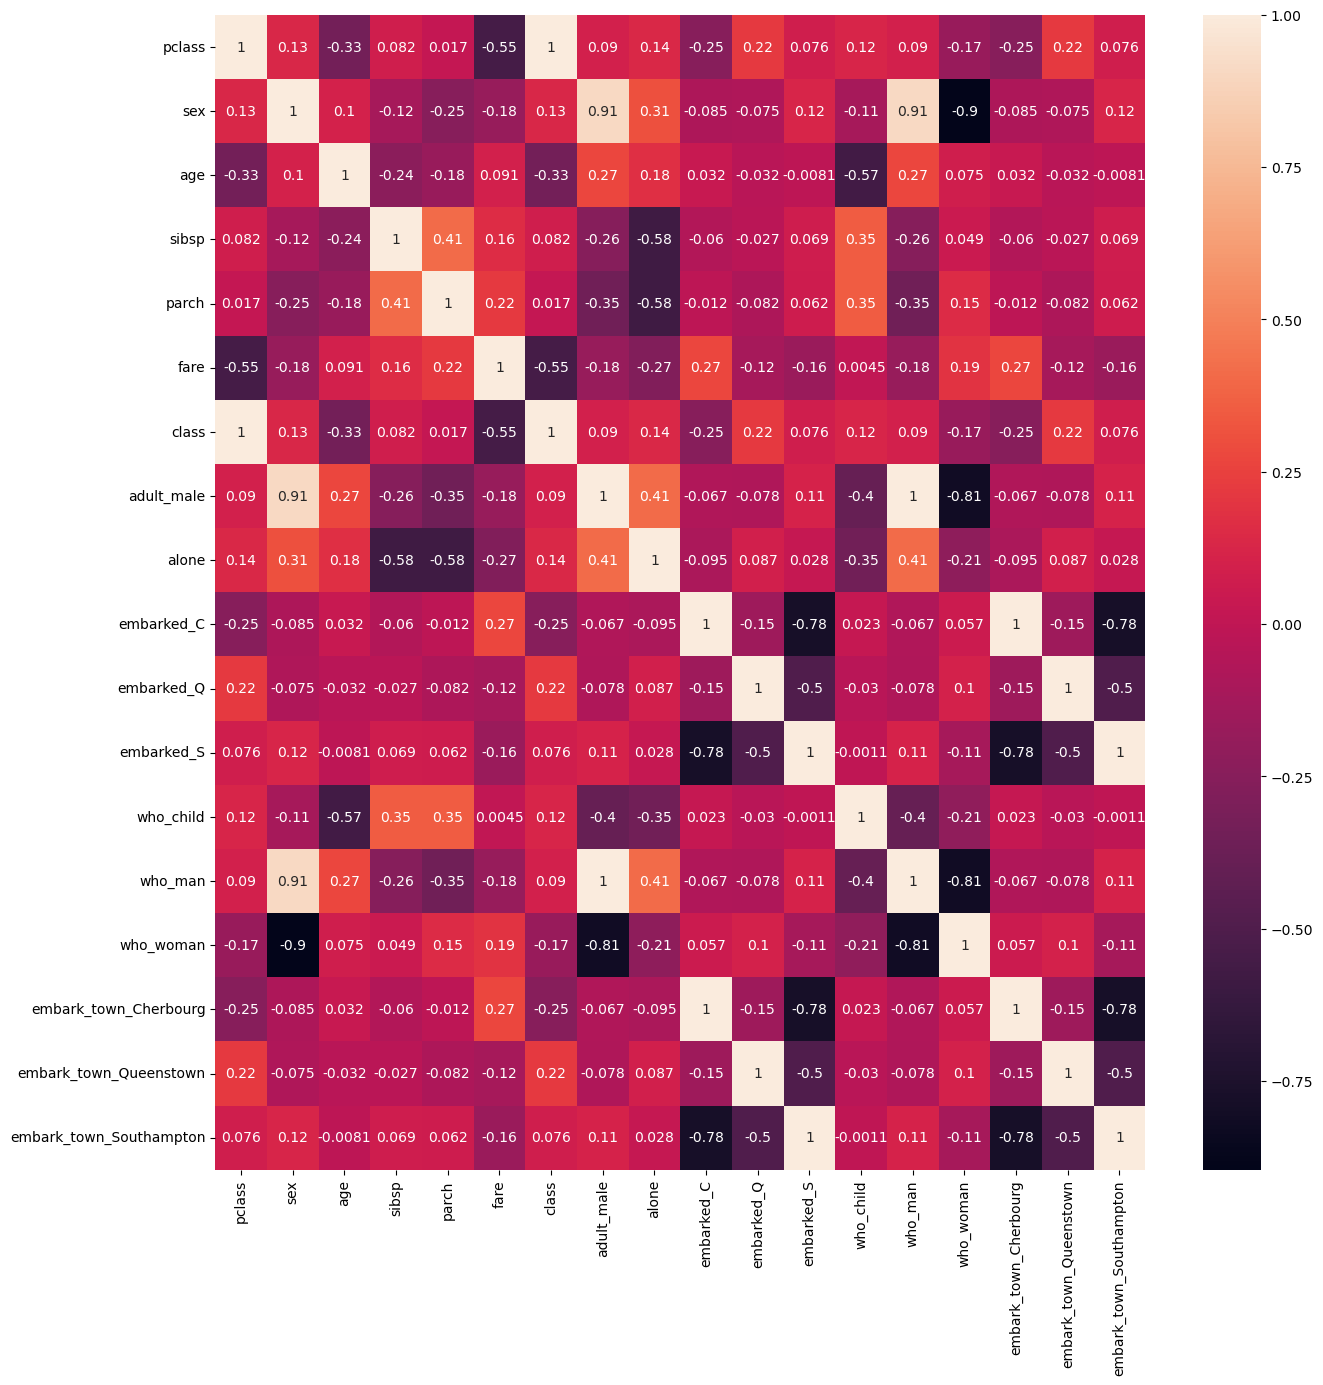

In [75]:
## Looking at the correlation between the features of data so that we can perform feature selection

plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True)

In [76]:
## embarked_S carry same information as embark_town_Southampton therefore dropping embarked_S column and simmilarly dropping embarked_Q and embarked_S column

X.drop(columns=["embarked_C","embarked_Q","embarked_S"],axis=1,inplace=True)

In [77]:
## Now adult_male and who_male column carry the same information therefore we will drop adult_male column and similary we will be dropping class column

X.drop(columns=["adult_male","class"],axis=1,inplace=True)

In [78]:
X.shape

(889, 13)

In [79]:
X.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'alone', 'who_child',
       'who_man', 'who_woman', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
## Splitting the dataset in train test dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [82]:
## Scalling the data

from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
X_train = scaler.fit_transform(X_train)

In [85]:
X_train

array([[ 0.81552849, -1.39065478, -0.58206085, ..., -0.48304589,
        -0.31176809,  0.62017367],
       [-0.38611305, -1.39065478,  1.54420966, ..., -0.48304589,
        -0.31176809,  0.62017367],
       [-0.38611305,  0.71908573, -0.05049322, ..., -0.48304589,
        -0.31176809,  0.62017367],
       ...,
       [-1.58775459, -1.39065478,  1.3923332 , ..., -0.48304589,
        -0.31176809,  0.62017367],
       [ 0.81552849, -1.39065478, -0.65799909, ..., -0.48304589,
        -0.31176809,  0.62017367],
       [ 0.81552849,  0.71908573,  0.25325971, ..., -0.48304589,
        -0.31176809,  0.62017367]])

In [86]:
X_test = scaler.transform(X_test)

In [87]:
X_test

array([[ 0.81552849,  0.71908573, -0.12643146, ..., -0.48304589,
        -0.31176809,  0.62017367],
       [-1.58775459, -1.39065478, -1.18956672, ..., -0.48304589,
        -0.31176809,  0.62017367],
       [ 0.81552849, -1.39065478, -1.18956672, ...,  2.07019668,
        -0.31176809, -1.61245155],
       ...,
       [ 0.81552849,  0.71908573, -0.12643146, ..., -0.48304589,
        -0.31176809,  0.62017367],
       [-0.38611305, -1.39065478, -0.12643146, ..., -0.48304589,
        -0.31176809,  0.62017367],
       [-1.58775459, -1.39065478, -0.20236969, ..., -0.48304589,
        -0.31176809,  0.62017367]])

In [88]:
## This is binary classification problem there we will start or model training with different different classifcation algorithms and one with best accuracy will be selected

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
LR_model = LogisticRegression()

In [91]:
LR_model.fit(X_train,y_train)

LogisticRegression()

In [92]:
y_pred_LR = LR_model.predict(X_test)

In [93]:
y_pred_LR 

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1])

In [94]:
from sklearn.metrics import accuracy_score,classification_report

In [95]:
accuracy = accuracy_score(y_test,y_pred_LR)
cr = classification_report(y_test,y_pred_LR)

In [96]:
print(accuracy)
print(cr)

0.8071748878923767
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       141
           1       0.73      0.76      0.74        82

    accuracy                           0.81       223
   macro avg       0.79      0.80      0.79       223
weighted avg       0.81      0.81      0.81       223



In [100]:
from sklearn.naive_bayes import GaussianNB

In [102]:
GNB_model = GaussianNB()

In [103]:
GNB_model.fit(X_train,y_train)

GaussianNB()

In [106]:
y_pred_GNB = GNB_model.predict(X_test)

In [109]:
accuracy = accuracy_score(y_test,y_pred_GNB)
cr = classification_report(y_test,y_pred_GNB)

In [110]:
print(accuracy)
print(cr)

0.8071748878923767
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       141
           1       0.72      0.77      0.75        82

    accuracy                           0.81       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



In [111]:
from sklearn.svm import SVC

In [112]:
SVC_model = SVC()

In [113]:
SVC_model.fit(X_train,y_train)

SVC()

In [114]:
y_pred_SVC = SVC_model.predict(X_test)

In [115]:
accuracy = accuracy_score(y_test,y_pred_SVC)
cr = classification_report(y_test,y_pred_SVC)

In [116]:
print(accuracy)
print(cr)

0.8161434977578476
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       141
           1       0.76      0.73      0.75        82

    accuracy                           0.82       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.82      0.82       223



In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
DTC_model = DecisionTreeClassifier()

In [119]:
DTC_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [120]:
y_pred_DTC = DTC_model.predict(X_test)

In [121]:
accuracy = accuracy_score(y_test,y_pred_DTC)
cr = classification_report(y_test,y_pred_DTC)

In [122]:
print(accuracy)
print(cr)

0.7623318385650224
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       141
           1       0.68      0.67      0.67        82

    accuracy                           0.76       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.76      0.76      0.76       223



In [98]:
## Putt the value below and check the prediction

In [125]:
def get_info():
    pclass = int(input("Enter Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)"))
    sex = int(input("Enter your gender: 0 for female , 1 for male"))
    age = int(input("Enter the age"))
    sibsp = int(input("Enter the number of siblings and spouses aboard"))
    parch = int(input("Enter the number of parents and children of the passenger aboard"))
    fare = float(input("Enter the fare of ticket"))
    alone = int(input("The person is alone or not: True-1 and False-0 "))
    who_child = int(input("child or not: child-1 not_child-0"))
    who_man = int(input("woman or not: woman-1 not_woman-0"))
    who_woman = int(input("man or not: man-1 not_man-0"))
    embark_town_Cherbourg = int(input('is embarke town Cherbourg: yes-1 , no-0'))
    embark_town_Queenstown =  int(input('is embarke town Queenstown: yes-1 , no-0'))
    embark_town_Southampton = int(input('is embarke town Southampton: yes-1 , no-0'))
               
    
    return pclass,sex,age,sibsp,parch,fare,alone,who_child,who_woman,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton

def get_dataframe():
    pclass,sex,age,sibsp,parch,fare,alone,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton = get_info()
    df = pd.DataFrame({"pclass":[pclass],
                          "sex"  :[sex],
                          "age"  :[age],
                          "sibsp" :[sibsp],
                          "parch":[parch],
                          "fare" :[fare],
                          "alone":[alone],
                          "who_child" : [who_child],
                          "who_man" : [who_man],
                          "who_woman" : [who_woman],
                          "embark_town_Cherbourg" : [embark_town_Cherbourg],
                          "embark_town_Queenstown": [embark_town_Queenstown],
                          "embark_town_Southampton" : [embark_town_Southampton]}
                         )
    return df

def prediction():
    df = get_dataframe()
    df = scaler.transform(df)
    predicted = SVC_model.predict(df)
    if predicted == 1:
        result = "Survived"
    elif predicted == 0:
        result = "Did not survived"
    return result

In [126]:
prediction()

Enter Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class) 2
Enter your gender: 0 for female , 1 for male 1
Enter the age 22
Enter the number of siblings and spouses aboard 0
Enter the number of parents and children of the passenger aboard 0
Enter the fare of ticket 250
The person is alone or not: True-1 and False-0  1
child or not: child-1 not_child-0 0
woman or not: woman-1 not_woman-0 0
man or not: man-1 not_man-0 1
is embarke town Cherbourg: yes-1 , no-0 1
is embarke town Queenstown: yes-1 , no-0 0
is embarke town Southampton: yes-1 , no-0 0


'Did not survived'